In [22]:
import random
import matplotlib.pyplot as plt

N = 2000
SEQ_N = 1000
RUNS = 10
C_SIZES = [20, 50, 70, 100, 200]
HOT_PAGES = list(range(0, int(0.2 * N)))
COLD_PAGES = list(range(int(0.2 * N), N))
_80_20_PROBABILITY = 0.8

In [23]:
def generate_seq():
  seq = []
  for _ in range(SEQ_N):
    if random.random() < _80_20_PROBABILITY:
      hot_page_random = random.choice(HOT_PAGES)
      seq.append(hot_page_random)
    else:
      cold_page_random = random.choice(COLD_PAGES)
      seq.append(cold_page_random)
  return seq


In [24]:
def simulate_rand_alg(seq,cache_capacity):
  cache = []
  hits = 0

  for page in seq:
    if page in cache:
      hits += 1
    else:
      if len(cache) < cache_capacity:
        cache.append(page)
      else:
        evict_page_ind = random.randrange(cache_capacity)
        cache[evict_page_ind] = page

  return hits/len(seq)


In [25]:
def simulate_opt_alg(seq, cache_capacity):
  cache = []
  hits = 0
  for i,page in enumerate(seq):
    if page in cache:
      hits += 1
    else:
      if len(cache) < cache_capacity:
        cache.append(page)
      else:
        future_pages = seq[i+1:]
        distances = []
        for cached_page in cache:
          if cached_page in future_pages:
            distances.append(future_pages.index(cached_page))
          else:
            distances.append(len(future_pages))
        evict_page_ind = distances.index(max(distances))
        cache[evict_page_ind] = page

  return hits / len(seq)


In [26]:
def run_simulation():
  rand_results = []
  opt_results = []

  for cache_capacity in C_SIZES:
    rand_hits = []
    opt_hits = []
    for _ in range(RUNS):
      seq = generate_seq()
      rand_hits.append(simulate_rand_alg(seq,cache_capacity))
      opt_hits.append(simulate_opt_alg(seq,cache_capacity))
    rand_results.append(sum(rand_hits) / RUNS)
    opt_results.append(sum(opt_hits) / RUNS)
  return rand_results,opt_results


In [28]:
rand_results, opt_results = run_simulation()
print(rand_results, opt_results)

[0.0346, 0.0754, 0.1102, 0.15030000000000002, 0.273] [0.2029, 0.30979999999999996, 0.3517, 0.39780000000000004, 0.4666]


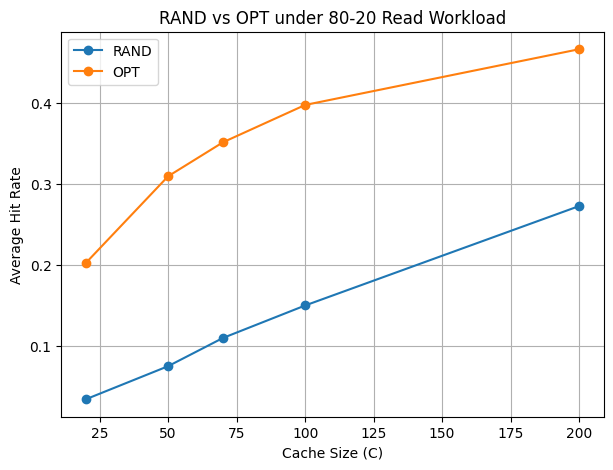

In [29]:
plt.figure(figsize=(7,5))
plt.plot(C_SIZES, rand_results, marker='o', label='RAND')
plt.plot(C_SIZES, opt_results, marker='o', label='OPT')
plt.xlabel("Cache Size (C)")
plt.ylabel("Average Hit Rate")
plt.title("RAND vs OPT under 80-20 Read Workload")
plt.legend()
plt.grid(True)
plt.show()